# Exercise 2.8

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.
sns.set_theme() # activate seaborn default theme


In [6]:
college = pd.read_csv('./datasets/College.csv', index_col='Unnamed: 0')
college.index.name = 'Names'
college.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [7]:
# C
college.describe(include='all')


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,NaN,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,NaN,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,NaN,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,NaN,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,NaN,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00


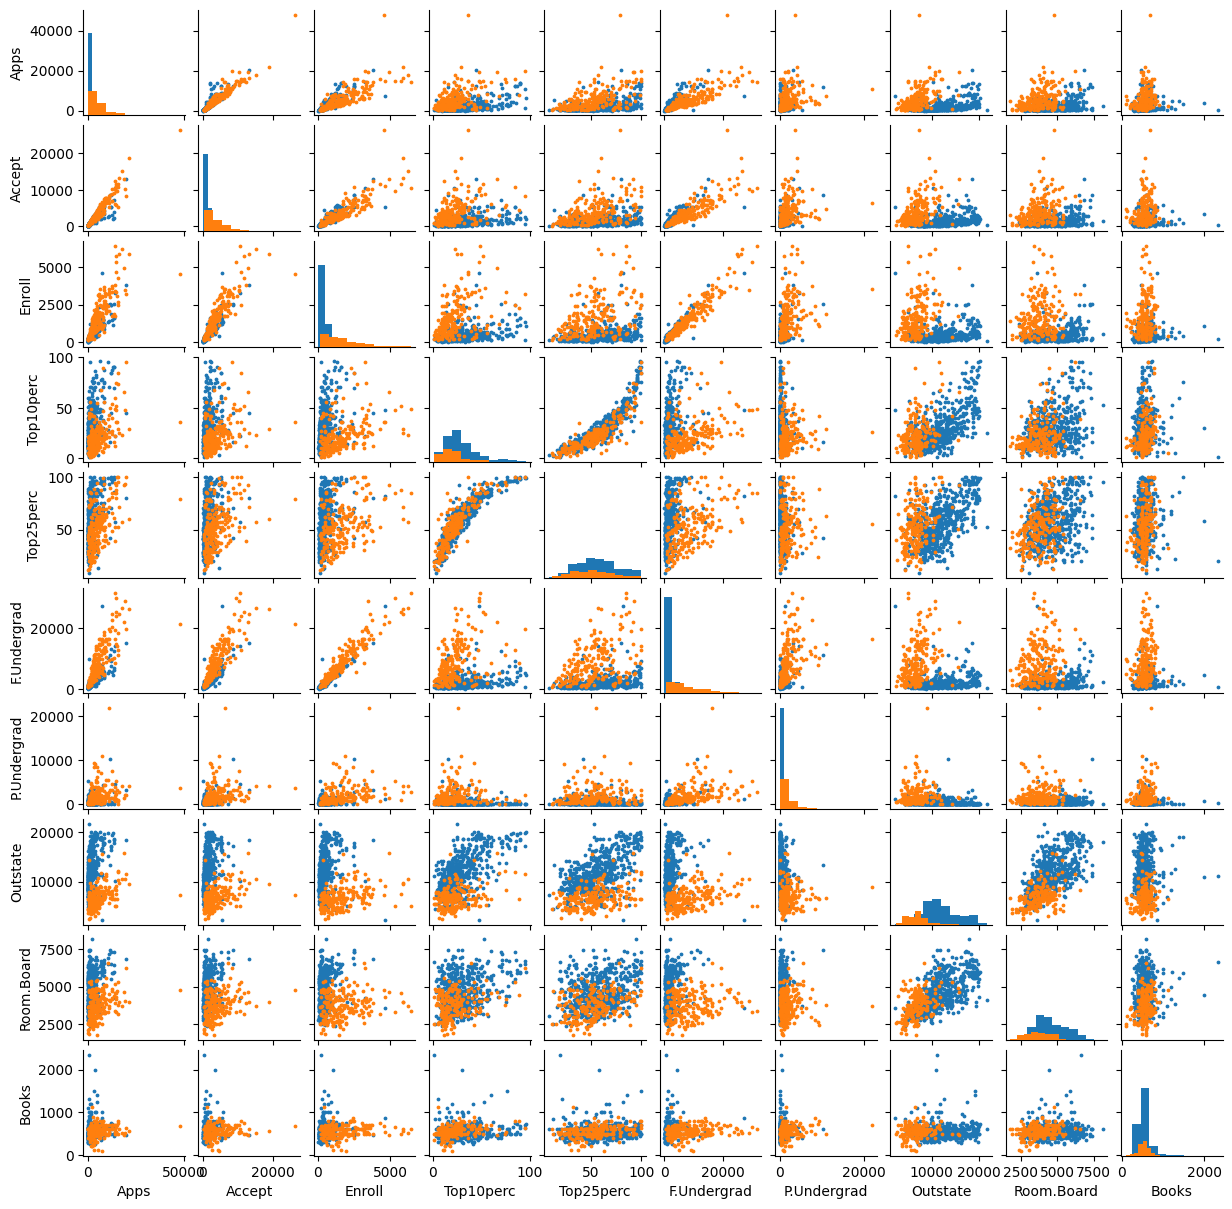

In [8]:
# D
g = sns.PairGrid(college, vars=college.iloc[:,1:11], hue='Private')
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)


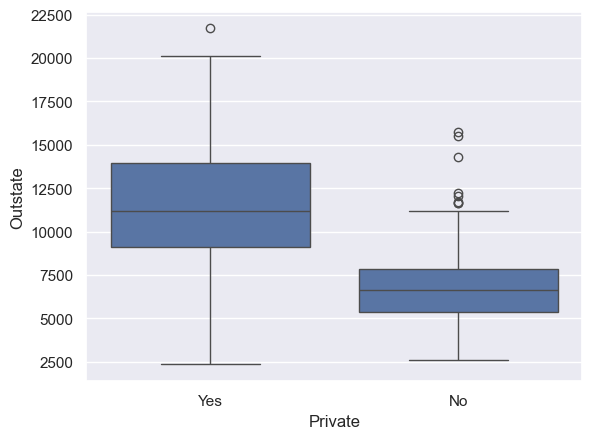

In [15]:
# E
sns.boxplot(x='Private', y='Outstate', data=college);


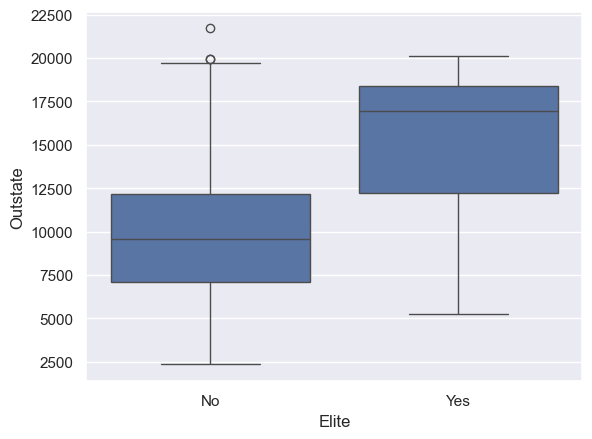

In [19]:
# F
college.loc[college['Top10perc']>50, 'Elite'] = 'Yes'
college['Elite'] = college['Elite'].fillna('No')

sns.boxplot(x='Elite', y='Outstate', data=college);

In [44]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

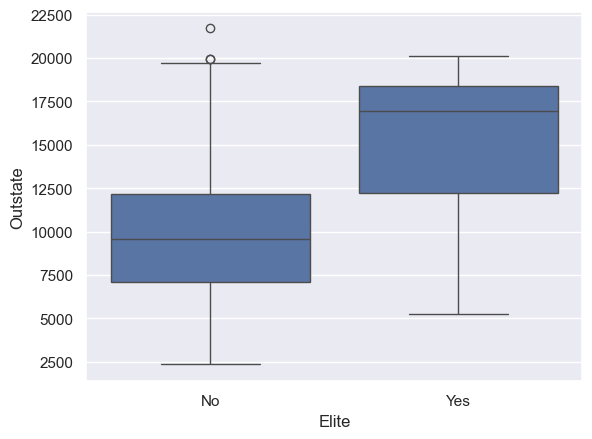

In [41]:
# F alternative

# remove irrelevant columns
college = college.drop('Elite-alt', axis=1)
college['Elite-alt'] = pd.cut(college['Top10perc'], [0,50,100],labels=['No', 'Yes'])
college[['Elite-alt', 'Top10perc']]
sns.boxplot(x='Elite', y='Outstate', data=college);

In [43]:
# count bin frequency
college['Elite-alt'].unique()

['No', 'Yes']
Categories (2, object): ['No' < 'Yes']

In [75]:
# G

## Start by binning some variables
## Applications

# college['Apps_bin'] = pd.cut(college['Apps'], 3).value_counts()

# pd.cut(college['Apps'], 3).value_counts()

college['Apps_bin'] = pd.cut(college['Apps'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(college['Apps_bin'].value_counts())

print('\n\n')

print(pd.cut(college['Apps'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], retbins=True))


Apps_bin
Very Low     730
Low           42
Medium         4
Very High      1
High           0
Name: count, dtype: int64



(Names
Abilene Christian University      Very Low
Adelphi University                Very Low
Adrian College                    Very Low
Agnes Scott College               Very Low
Alaska Pacific University         Very Low
                                    ...   
Worcester State College           Very Low
Xavier University                 Very Low
Xavier University of Louisiana    Very Low
Yale University                        Low
York College of Pennsylvania      Very Low
Name: Apps, Length: 777, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High'], array([3.29870e+01, 9.68360e+03, 1.92862e+04, 2.88888e+04, 3.84914e+04,
       4.80940e+04]))


In [91]:
# Bins creation
college['PhD'] = pd.cut(college['PhD'], 3, labels=['Low', 'Medium', 'High'])
college['Grad.Rate'] = pd.cut(college['Grad.Rate'], 5, labels=['Very low', 'Low', 'Medium', 'High', 'Very high'])
college['Books'] = pd.cut(college['Books'], 2, labels=['Low', 'High'])
college['Enroll'] = pd.cut(college['Enroll'], 4, labels=['Very low', 'Low', 'High', 'Very high'])


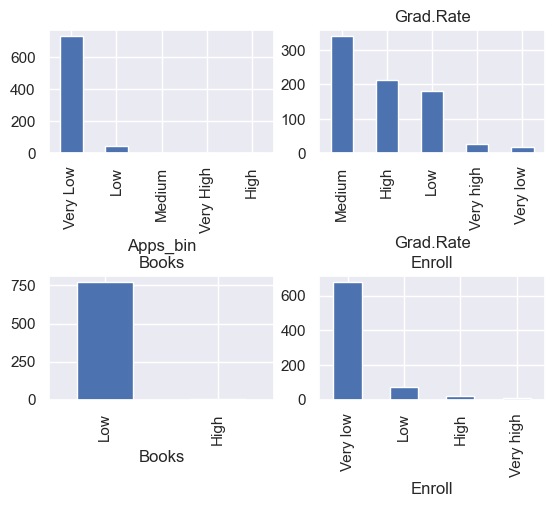

In [99]:
# G

# https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

# Plot histograms
fig = plt.figure()

plt.subplot(221)    # subplot(numrows, numcols, plot_number)
college['Apps_bin'].value_counts().plot(kind='bar')

# ax.ticklabel_format(useOffset=False, style='plain')

plt.subplot(222)
college['Grad.Rate'].value_counts().plot(kind='bar', title = 'Grad.Rate');
plt.subplot(223)
college['Books'].value_counts().plot(kind='bar', title = 'Books');
plt.subplot(224)
college['Enroll'].value_counts().plot(kind='bar', title = 'Enroll');

fig.subplots_adjust(hspace=1) # To add space between subplots



# axes[0,0] = college['Apps_bin'];

